In [14]:
# Script per analizzare errori / grafici

import numpy as np
import matplotlib . pyplot as plt
from scipy . stats import truncnorm # gaussiana andard troncata
import sys
import os
import time
from termcolor import colored
from threading import *
import progressbar

def sigma (x):
    return 1/(1+ np.exp (- x))

def dsigmaapprox (x ):
    return x *(1 - x)

def gaussiana_troncata ( media =0 , varianza =1 , a =0 , b=10) :
    return truncnorm ((a - media )/ varianza , (b - media )/varianza , loc = media , scale = varianza )

In [40]:
# *****************************************
# PREPROCESSAMENTO DATI DI TRAINING e TEST
dimensione_immagine = 28 # immaginte 28 x 28
numero_etichette = 10 # numero delle cifre 0 ,1 ,... ,9
pixel_immagine = dimensione_immagine * dimensione_immagine
# 784 ~ numero di colonne del test_data + 1 che e' la colonna del label


train_data = []
test_data = []

class CaricamentoTrain ( Thread ):
    def run ( self ): 
        global data_path
        global train_data
        train_data1 = pd.read_csv( "mnist_train.csv",delimiter =",")
        train_data.append( train_data1 )
        train_data = train_data[0]
        print(train_data)
        return train_data    

class CaricamentoTest ( Thread ):
    def run ( self ):
        global data_path
        global test_data
        test_data1 = pd.read_csv( "mnist_test.csv", delimiter =",")
        test_data.append( test_data1 )
        test_data = test_data[0]
        print(test_data)
        return test_data

class BarraTrain ( Thread ):
    def run ( self ):
        widgets =['[', progressbar.FileTransferSpeed() , ']',progressbar.Bar () ,'(', progressbar.Percentage () , ') ','(', progressbar.ETA () , ')',]
        for i in progressbar.progressbar ( range (200) , widgets = widgets , prefix ="Caricamento dati di training.\t"):
            time.sleep (0.1)

class BarraTest ( Thread ):
     def run ( self ):
        widgets =[ ' [', progressbar.FileTransferSpeed () , '] ',progressbar.Bar () ,' (', progressbar.Percentage () , ') ','(', progressbar.ETA () , ')',]
        for i in progressbar.progressbar ( range (100) , widgets = widgets ,prefix ="Caricamento dati di test.\t"):
            time.sleep (0.1)

t1 = CaricamentoTrain()
t3 = CaricamentoTest()
t2 = BarraTrain()
t4 = BarraTest()
t1.start()
time.sleep(0.01)
t2.start()
t1.join()
t2.join()
print ("\nProcesso di caricamento e processamento dei dati di training completato .\n", end ='\n')
time.sleep(1)
t3.start()
time.sleep(0.01)
t4.start()
t3.join()
t4.join()
print ("\nProcesso di caricamento e processamento dei dati di test completato .\n", end ='\n')




Exception in thread Thread-48:
Traceback (most recent call last):
  File "C:\Users\CASA-PC\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "<ipython-input-40-08be1cc61d16>", line 35, in run
TypeError: 'module' object is not callable


       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

Exception in thread Thread-49:
Traceback (most recent call last):
  File "C:\Users\CASA-PC\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "<ipython-input-40-08be1cc61d16>", line 41, in run
TypeError: 'module' object is not callable


      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [42]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
x = np.asfarray(test_data)
x[1, 1:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 116., 125., 171., 255., 255.,
       150.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       169., 253., 253., 253., 253., 253., 253., 218.,  30.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 169., 253., 25

In [81]:
x[1,:]

array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 116., 125., 171., 255.,
       255., 150.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 169., 253., 253., 253., 253., 253., 253., 218.,  30.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 169., 25

In [64]:
test_data.label

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [59]:
scala = 0.99 / 255 #i codici per pixel grigi vannoda 0 a 255
immagini_training = np.asfarray ( train_data )[: , 1:] *scala + 0.01
immagini_test = np.asfarray ( test_data )[: , 1:] *scala + 0.01
# prendiamo valori nella matrice tra (0 ,1] -> [0.1 ,1]
#e normalizziamo
label_training = np.asfarray ( train_data )[: , :1]
label_test = np.asfarray ( test_data )[: , :1]

# associamo ad ogni cifra un vettore della basecanonica
v= np.arange (10)
for etichetta in range (10) :
    ei =( v == etichetta ). astype ( np.int )
 # print (" Etichetta ", etichetta , " vettore ", ei)

# facciamo la stessa cosa sul vettore dei label memorizzato prima e
# togliamo sostiuiamo gli 0 - >0.01
tmp = np.arange ( numero_etichette )
etichette_training = ( tmp == label_training ).astype( np.float )
etichette_test =( tmp == label_test ).astype( np.float )

etichette_training [ etichette_training ==0]=0.01
etichette_test [ etichette_test ==0]=0.01

etichette_training [ etichette_training ==1]=1
etichette_test [ etichette_test ==1]=1

# Creiamo la classe della rete di richiamo
# Definiamo gli estremi di troncamento e i paramentri
#di standardizzazione della gaussiana

----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------00----
--------------------0000----
----------------00000000----
-------------00000000000----
----------000000000000------
-------000000000------------
----0000000000--------------
----000000------------------
----00----------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------


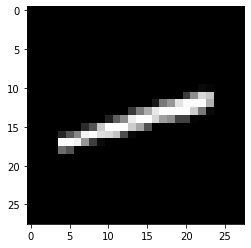

In [118]:
ind = 2

due = x[ind, 1:]
due = [due[i::28] for i in range(28)]

for i in range(28):
    for j in range(28):
        if j == 27:
            if due[i][j]==0:
                print("-")
            else: print(0)
        else:    
            if due[i][j]==0:
                print("-", end = '')
            else: print(0, end = '')

from keras.datasets import mnist
from matplotlib import pyplot

pyplot.imshow(due, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [96]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_test.csv', one_hot = True)
first_image = mnist.test.images[ind]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

784

In [100]:
a = [due[i::28] for i in range(28)]
len(a[1])

28

In [91]:
def split(arr, size):
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr   = arr[size:]
        arrs.append(arr)
    return arrs

In [19]:

# **********************************
# CREAZIONE CLASSE RETE NEURONALE

class BM :
    def __init__ ( self , nodi_visibili , nodi_nascosti , nodi_output , tasso_apprendimento ) :
        self.nodi_visibili = nodi_visibili
        self.nodi_nascosti = nodi_nascosti
        self.nodi_output = nodi_output
        self.tasso_apprendimento = tasso_apprendimento

        self.CreaMatricePesi()
        self.LogErr =0
        self.MSE =0

    def CreaMatricePesi ( self ):
 # inizializziamo la matrice dei pesi usando la distribuzione
 # normale definita sopra [ cfr.Masters Timothy ]
        var1 =1 / np.sqrt( self.nodi_visibili )
        M = gaussiana_troncata (0 ,1 , - var1 , var1 )
        self.MatriceInputHidden = M.rvs(( self.nodi_nascosti, self.nodi_visibili ))
        var2 =1/ np.sqrt ( self.nodi_nascosti )
        M = gaussiana_troncata (0 ,1 , - var2 , var2 )
        self.MatriceHiddenOutput = M. rvs((self.nodi_output, self.nodi_nascosti ))

 # funzione di training applichiamo usiamo un algoritmo di backpropagation
 # una discesa del gradiente ( con approssimazionedella derivata ). NO BIAS
          
    def Allenamento ( self , vettore_input ,vettore_obbiettivo ):
        vettore_input = np.array ( vettore_input , ndmin=2).T
        vettore_obbiettivo = np.array (vettore_obbiettivo , ndmin =2).T
 # calcolo le probabilita ' di attivaizione dei neuronivisibili
        output_v1 = np.dot( self.MatriceInputHidden , vettore_input )
        output_hid = sigma( output_v1 )
 # calcolo le probabilita ' di attivazione dei vettorihidden
        output_v2 = np.dot( self.MatriceHiddenOutput ,output_hid )
        output = sigma( output_v2 )
 # errore strato visibile
        errore = vettore_obbiettivo - output # calcolo errore
 # errore quadratico medio e cross entropy
        uno = np.array ([1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1])
        self.MSE =(1/10) *((( output - vettore_obbiettivo) **2).sum () )
        self.LogErr = -( vettore_obbiettivo * np.log (output ) +( uno - vettore_obbiettivo )* np.log ( uno - output ) ). sum ()
 # aggiorniamo i pesi MHO
        delta = errore * dsigmaapprox ( output )
        aggiornamento = self.tasso_apprendimento * np.dot ( delta , output_hid .T)
        self.MatriceHiddenOutput += aggiornamento
 # errore strato nascosto
        errore_hidden = np.dot( self.MatriceHiddenOutput .T , errore )
 # aggiornamnento pesi MIH
        delta1 = errore_hidden * dsigmaapprox ( output_hid)
        self.MatriceInputHidden += self.tasso_apprendimento * np.dot ( delta1 , vettore_input.T)

    def Pensa ( self , vettore_input ):
        vettore_input = np.array ( vettore_input ).T
        vettore_out = sigma ( np.dot ( self.MatriceInputHidden , vettore_input ) )
        vettore_out = sigma ( np.dot ( self.MatriceHiddenOutput , vettore_out ))
    return vettore_out

 # *** FUNZIONI DI ANALLISI E VALIDAZIONE ***
 # Calcoliamo la matrice di confusione , che da ' unastima della
 # accuratezza del processo di training ericonoscimento .
 # Gli elementi sulla diagonale sono il numero deipattern
 # giustamente riconosciuti e collegati al labelgiusto .
 # Quelli extradiagonali sono quelli non correttamenteassociati

    def MatricediConfusione ( self , dati , etichetta ):
        MatConf = np.zeros ((10 ,10) , dtype =int)
        for i in range ( len ( dati )) :
            risposta = self.Pensa ( dati [i ])
            risposta_max = risposta.argmax () # indice del max sulla riga
            task = etichetta [i ][0]
            MatConf [ risposta_max , int ( task )] += 1
        return MatConf

 # sulla diagonale vi sono il numero delle predizioni corrette

    def CalcoloPrecisione ( self , etichetta , MatConf ): 
        colonna = MatConf [: , etichetta ] # prendo la colonna riferita al label
        return MatConf [ etichetta , etichetta ]/ colonna.sum ()
          
#La precisione e' la percentuale delle previsionipositive
# corrette sul totale delle previsioni positive delmodello .
 # percisione_i := \ frac {M_{i,i }}{\ sum_j M_{j,i}}
 # cioe ' l'elemento i- esimo della diagonale fratto lasomma
 # degli elementi della colonna i- esima

    def CaloloRichiamo ( self , etichetta , MatConf ):
        riga = MatConf [ etichetta ,:] # prendo la riga riferita al label
        return MatConf [ etichetta , etichetta ]/ riga.sum()
 
 #Il richiamo e' la percentuale delle previsionipositive
 # corrette sul totale delle istanze positive .
 # richiamo_i := \ frac {M_{i,i }}{\ sum_j M_{ij }}
 # cioe ' e' l'elemento i- esimo della diagonale frattola somma
 # degli elementi della riga i- esima

 # Analizziamo i risultati e vediamo quale istanzesono corrette
 #e quali sono sbagliate , per avere una stima dell ' errore compuito .
    def Analisi ( self , dati , etichetta ) :
        giusto =0
        sbagliato =0
        for i in range ( len ( dati )) :
            risposta = self.Pensa ( dati [i ]) # processo il pattern i- esimo
            risposta_max = risposta.argmax ()
 # determino l'inidice dell 'elemento di modulo max
 #e controllo se per caso non sta sulla diagonale
 #in quel caso sara ' corretto , altrimenti sara 'sbagliato
            if risposta_max == etichetta [i ]:
                giusto += 1
            else :
                sbagliato += 1
        return giusto , sbagliato

    def Accuratezza ( self , MatConf ):
        somma_diagonale = MatConf.trace ()
        somma_totale = MatConf.sum ()
        return somma_diagonale / somma_totale
 # facciamo il rapporto tra la traccia della matrice ela somma di tutti
 # gli elementi : infatti sulla diagonale vi sono leistanze correttamente
 # riconosciute e abbianate .

 # ***********************************
 # CREAZIONE CLASSE della RETE
Arr_Nodi_Nascosti =20 +20* np.array ( range (5) ) # numerodi neuroni nascosti
Arr_Tasso_Apprendimento = 0.1 + 0.2* np.array ( range(5) )

 # creo una lista di oggetti in cui vi sono le varie
 # classi BM con diversi valori dei parametri

ListaBM =[]
for i in range (5) :
    for j in range (5) :
        MacchinaBoltzmann = BM ( nodi_visibili =pixel_immagine ,nodi_nascosti =Arr_Nodi_Nascosti [ i],nodi_output =10 ,tasso_apprendimento =Arr_Tasso_Apprendimento [j ])ListaBM.append ( MacchinaBoltzmann )

 # ***************************************
 # Trasformo la lista in una matrice 5x5
 # per poterci lavorare sopra
          
L= ListaBM
L= np.asarray ( ListaBM )
L= np.split (L ,5 , axis =0)
L1 = np.stack (L)

# raccolgo i valori delgi errori a processo
#di allenamento compleato
MatErr = np.zeros ((5 ,5) )
MatLogErr = np.zeros ((5 ,5) )

 # raccolgo i valori delgi errori durante il processo
MatIterateMSE =[]
MatIterateLogErr =[]

AssembleMatriceConfusione =[] # Lista contentente Mat .Conf .
MatriceAccuratezze = np.zeros ((5 ,5) ) # Matrice delle accuratezze


for i in range (5) :
    for j in range (5) :
        Macchina = L1 [i ][ j]
        for k in range ( len ( immagini_training )):
            Macchina.Allenamento ( immagini_training [k], etichette_training [k ])
            MatErr [ i ][ j] = Macchina.MSE
            MatLogErr [ i ][ j] = Macchina.LogErr
            MC = Macchina.MatricediConfusione (immagini_training , label_training )
            AssembleMatriceConfusione.append ( MC )
            MatriceAccuratezze [ i ][ j] = Macchina.Accuratezza ( MC )

AssembleMC = AssembleMatriceConfusione
AssembleMC = np.asarray ( AssembleMC )
AssembleMC = np.split ( AssembleMC ,5 , axis =0)
AssembleMC = np.stack ( AssembleMC )

 # ##########################
 # TEST RETE
NumTest =20
Matrice_MSE_TEST =[]

for i in range (5) :
    for j in range (5) :
        BM = L1 [ i ][ j]
        Vett_MSE_Test =[]
        for k in range ( NumTest ): # faccio i primi 50 test per ogni par .
            out = BM.Pensa ( immagini_test [k ])
            err = (1/10) *((( out - etichette_test [ k ])**2).sum () )
            Vett_MSE_Test.append ( err ) # vett 1 xrange
            Matrice_MSE_TEST.append ( np.asarray (
    Vett_MSE_Test , dtype = float ))

Matrice_MSE_TEST = np.asarray ( Matrice_MSE_TEST )
Matrice_MSE_TEST = np.split ( Matrice_MSE_TEST ,5 , axis =0)
Matrice_MSE_TEST = np.stack ( Matrice_MSE_TEST )

alpha =int( input (" Scegli un valore per il tasso diapprendimento \ ntra {1 ,3 ,5 ,7 ,9}: "))
N= int ( input (" Scegli il numero dei neuroni nascosti \ntra {20 ,40 ,60 ,80 ,100}: "))

if alpha == 1:
    alpha1 = 0
elif alpha == 3:
    alpha1 = 1
elif alpha == 5:
    alpha1 = 2
elif alpha == 7:
    alpha1 = 3
elif alpha == 9:
    alpha1 = 4

if N == 20:
    N1 = 0
                    
elif N == 40:
    N1 = 1
elif N == 60:
    N1 = 2
elif N == 80:
    N1 = 3
elif N == 100:
    N1 = 4

# ######################################
# VISUALIZZAZIONE DEI DATI CALCOLATI

fig1 , ax1 = plt.subplots ()
for i in range (5) :
    ax1.plot ( MatErr [i], label ="N=%s" % (( i +1) *20) ,marker ='o')
plt.xticks ( np.arange (0 ,5 , step =1) ,
labels = np.array ([0.1 ,0.3 ,0.5 ,0.7 ,0.9]) )
plt.title (r'Plotting $MSE_ {\ alpha }$', fontsize ='large ', fontweight ='bold ')
plt.xlabel (r'Valori di $\ alpha$ - Tasso di apprendimento ', fontsize ='large ')
plt.ylabel (r'$MSE_ {\ alpha }$', fontsize ='large ')
plt.legend ()

MatErr2 = MatErr .T
fig2 , ax2 = plt.subplots ()
for i in range (5) :
ax2.plot ( MatErr2 [i], label =r'$\ alpha$ =%.2 g' % ((2* i +1) *0.1) , marker ='*')
plt.xticks ( np.arange (0 ,5 , step =1) ,
labels = np.array ([20 ,40 ,60 ,80 ,100]) )
plt.title (r'Plotting $MSE_N$ ', fontsize ='large ',fontweight ='bold ')
plt.xlabel (r'$N$ - Numero di neuroni nascosti ', fontsize ='large ')
plt.ylabel (r'$MSE_N$ ', fontsize ='large ')
plt.legend ()

fig3 , ax3 = plt.subplots ()
for i in range (5) :
    ax3.plot ( MatLogErr [i ], label ="N=%s" % (( i +1) *20), marker ='o')
plt.xticks ( np.arange (0 ,5 , step =1) ,
labels = np.array([0.1 ,0.3 ,0.5 ,0.7 ,0.9]) )
plt.title (r'Plotting Cross Entropy $CE_ {\ alpha }$',fontsize ='large ', fontweight ='bold ')
plt.xlabel (r'Valori di $\ alpha$ - Tasso di apprendimento ', fontsize ='large ')
plt.ylabel (r'$CE_ {\ alpha }$', fontsize ='large ')
plt.legend ()

MatLogErr2 = MatLogErr .T
fig4 , ax4 = plt.subplots ()
for i in range (5) :
    ax4.plot ( MatLogErr2 [ i], label =r'$\ alpha$ =%.2 g' %((2* i +1) *0.1) , marker ='*')
plt.xticks ( np.arange (0 ,5 , step =1) , np.array ([20 ,40 ,60 ,80 ,100]) )
plt.title (r'Plotting Cross Entropy $CE_N$ ', fontsize ='large ', fontweight ='bold ')
plt.xlabel (r'$N$ - Numero di neuroni nascosti ',fontsize ='large ')
plt.ylabel (r'$CE_N$ ', fontsize ='large ')
plt.legend ()

fig5 , ax5 = plt.subplots ()
for i in range (5) :
    ax5.plot ( MatriceAccuratezze [i ], label ="N=%s" %(( i +1) *20) , marker ='o')
plt.xticks ( np.arange (0 ,5 , step =1) ,
labels = np.array([0.1 ,0.3 ,0.5 ,0.7 ,0.9]) )
plt.title (r'Plotting Accuratezza$_ {\ alpha }$',fontsize ='large ', fontweight ='bold ')
plt.xlabel (r'Valori di $\ alpha$ - Tasso di apprendimento ', fontsize ='large ')
plt.ylabel (r'$Acc_ {\ alpha }$', fontsize ='large ')
plt.legend ()
                       
MatriceAccuratezze2 = MatriceAccuratezze .T
fig6 , ax6 = plt.subplots ()
for i in range (5) :
    ax6.plot ( MatriceAccuratezze2 [ i], label =r'$\alpha$ =%.2 g' % ((2* i +1) *0.1) , marker ='*')
plt.xticks ( np.arange (0 ,5 , step =1) ,
np.array ([20 ,40 ,60 ,80 ,100]) )
plt.title (r'Plotting Accuratezza$_N$ ', fontsize ='large ', fontweight ='bold ')
plt.xlabel (r'$N$ - Numero di neuroni nascosti ',fontsize ='large ')
plt.ylabel (r'$Acc_N$ ', fontsize ='large ')
plt.legend ()

alpha = alpha *0.1
fig7 , ax7 = plt.subplots ()
ax7.plot ( Matrice_MSE_TEST [ N1 ][ alpha1 ], marker ='o',color ='r')
plt.xticks ( np.arange (0 , NumTest , step =1) , np.arange(20) +1)
plt.title (r'Plotting $MSE_ {\ alpha =%s,N=%s}$' %( alpha,N) , fontsize ='large ',fontweight ='bold ')
plt.xlabel (r'Esempio n- esimo del data set ', fontsize='large ')
plt.ylabel (r'$MSE$ ', fontsize ='large ')

 # #### ALTRE VISUALIZZAZIONI ERRORI #####
B1 = ListaBM [20]
E =[]
v_err =[]
t_err =[]
for k in range (10) :
    for i in range ( len ( immagini_training )):
        B1.Allenamento ( immagini_training [i ],etichette_training [i ])
    E. append ( B1.MatricediConfusione (immagini_training , label_training ))
    t_err.append (1 - B1.Accuratezza (E[k ]) )
    v_err.append ( B1.MSE )

v_err = np.asarray ( v_err )
t_err = np.asarray ( t_err )
x= np.arange (0 ,10 , step =1)
fig8 , ax8 = plt.subplots ()
ax8.plot (x , v_err , label =r'$MSE_ {%.2g, %s}$' % (alpha , N) , marker ='o', color ='r')
ax8.plot (x , t_err , label =r'$\ mathrm {acc}_ {%.2g ,%s}$'% ( alpha ,N) , marker ='*')
plt.xticks ( np.arange (0 ,10 , step =1) , np.arange (10) +1) 
titolo =(r'$MSE_ {\ alpha =%s,N=%s}$ e accuratezza per10 training ses .' %( alpha ,N))
plt.title ( titolo , fontsize ='large ', fontweight ='bold')
plt.xlabel (r'Sessione n- esima ', fontsize ='large ')
plt.ylabel (r'$MSE$ \ $\ mathrm { acc}$', fontsize ='large ')
plt.legend ()

SyntaxError: invalid syntax (<ipython-input-19-65cf85273153>, line 222)